# NHANES Data Exploration

CC-1089

Using data from the CDC/NHANES 2017-March 2020 Examination data:
https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&Cycle=2017-2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Body Measure Data

In [2]:
bmdata = pd.read_sas('data/P_BMX.XPT')
bmnames = {
    'SEQN' : 'Respondent sequence number',
    'BMDSTATS' : 'Body Measures Component Status Code',
    'BMXWT' : 'Weight (kg)',
    'BMIWT' : 'Weight Comment',
    'BMXRECUM' : 'Recumbent Length (cm)',
    'BMIRECUM' : 'Recumbent Length Comment',
    'BMXHEAD' : 'Head Circumference (cm)',
    'BMIHEAD' : 'Head Circumference Comment',
    'BMXHT' : 'Standing Height (cm)',
    'BMIHT' : 'Standing Height Comment',
    'BMXBMI' : r'Body Mass Index ($kg/m^2$)',
    'BMDBMIC' : 'BMI Category - Children/Youth',
    'BMXLEG' : 'Upper Leg Length (cm)',
    'BMILEG' : 'Upper Leg Length Comment',
    'BMXARML' : 'Upper Arm Length (cm)',
    'BMIARML' : 'Upper Arm Length Comment',
    'BMXARMC' : 'Arm Circumference (cm)',
    'BMIARMC' : 'Arm Circumference Comment',
    'BMXWAIST' : 'Waist Circumference (cm)',
    'BMIWAIST' : 'Waist Circumference Comment',
    'BMXHIP' : 'Hip Circumference (cm)',
    'BMIHIP' : 'Hip Circumference Comment'}
bmdata.rename(columns=bmnames, inplace=True)
bmdata

,Respondent sequence number,Body Measures Component Status Code,Weight (kg),Weight Comment,Recumbent Length (cm),Recumbent Length Comment,Head Circumference (cm),Head Circumference Comment,Standing Height (cm),Standing Height Comment,...,Upper Leg Length (cm),Upper Leg Length Comment,Upper Arm Length (cm),Upper Arm Length Comment,Arm Circumference (cm),Arm Circumference Comment,Waist Circumference (cm),Waist Circumference Comment,Hip Circumference (cm),Hip Circumference Comment
0,109263.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,1.0,42.2,NaN,NaN,NaN,NaN,NaN,154.7,NaN,...,36.3,NaN,33.8,NaN,22.7,NaN,63.8,NaN,85.0,NaN
2,109265.0,1.0,12.0,NaN,91.6,NaN,NaN,NaN,89.3,NaN,...,NaN,NaN,18.6,NaN,14.8,NaN,41.2,NaN,NaN,NaN
3,109266.0,1.0,97.1,NaN,NaN,NaN,NaN,NaN,160.2,NaN,...,40.8,NaN,34.7,NaN,35.8,NaN,117.9,NaN,126.1,NaN
4,109269.0,3.0,13.6,NaN,90.9,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,124818.0,1.0,108.8,NaN,NaN,NaN,NaN,NaN,168.7,3.0,...,45.6,NaN,38.6,NaN,33.6,NaN,114.7,NaN,118.0,NaN
14296,124819.0,1.0,15.4,NaN,94.9,NaN,NaN,NaN,93.7,NaN,...,NaN,NaN,17.5,NaN,15.8,NaN,48.4,NaN,NaN,NaN
14297,124820.0,1.0,22.9,NaN,NaN,NaN,NaN,NaN,123.3,NaN,...,NaN,NaN,24.3,NaN,18.5,NaN,57.5,NaN,NaN,NaN
14298,124821.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,176.4,NaN,...,42.0,NaN,39.5,NaN,31.4,NaN,97.1,NaN,99.8,NaN


In [3]:
bmdata.isnull().sum(axis=0)

Respondent sequence number                 0
Body Measures Component Status Code        0
Weight (kg)                              225
Weight Comment                         13712
Recumbent Length (cm)                  12830
Recumbent Length Comment               14257
Head Circumference (cm)                13990
Head Circumference Comment             14300
Standing Height (cm)                    1143
Standing Height Comment                14129
Body Mass Index ($kg/m^2$)              1163
BMI Category - Children/Youth           9551
Upper Leg Length (cm)                   3316
Upper Leg Length Comment               13812
Upper Arm Length (cm)                    810
Upper Arm Length Comment               13813
Arm Circumference (cm)                   816
Arm Circumference Comment              13807
Waist Circumference (cm)                1726
Waist Circumference Comment            13683
Hip Circumference (cm)                  4438
Hip Circumference Comment              13924
dtype: int

In [4]:
bmdata2 = bmdata.dropna(axis=1, thresh=int(0.2*len(bmdata)))
bmdata2 = bmdata2.drop(['Respondent sequence number', 'Body Measures Component Status Code'], axis=1)


In [5]:
bmdata2.corr()

,Weight (kg),Standing Height (cm),Body Mass Index ($kg/m^2$),BMI Category - Children/Youth,Upper Leg Length (cm),Upper Arm Length (cm),Arm Circumference (cm),Waist Circumference (cm),Hip Circumference (cm)
Weight (kg),1.000000,0.769794,0.918685,0.491157,0.466561,0.839773,0.963019,0.949765,0.880137
Standing Height (cm),0.769794,1.000000,0.497334,0.173946,0.819276,0.959529,0.724401,0.675033,0.108270
Body Mass Index ($kg/m^2$),0.918685,0.497334,1.000000,0.719811,0.157482,0.585871,0.914158,0.933210,0.940680
BMI Category - Children/Youth,0.491157,0.173946,0.719811,1.000000,0.175764,0.242624,0.591130,0.637022,0.782690
Upper Leg Length (cm),0.466561,0.819276,0.157482,0.175764,1.000000,0.725441,0.371979,0.249853,0.040081
Upper Arm Length (cm),0.839773,0.959529,0.585871,0.242624,0.725441,1.000000,0.820199,0.741937,0.318520
Arm Circumference (cm),0.963019,0.724401,0.914158,0.591130,0.371979,0.820199,1.000000,0.924459,0.837099
Waist Circumference (cm),0.949765,0.675033,0.933210,0.637022,0.249853,0.741937,0.924459,1.000000,0.876384
Hip Circumference (cm),0.880137,0.108270,0.940680,0.782690,0.040081,0.318520,0.837099,0.876384,1.000000


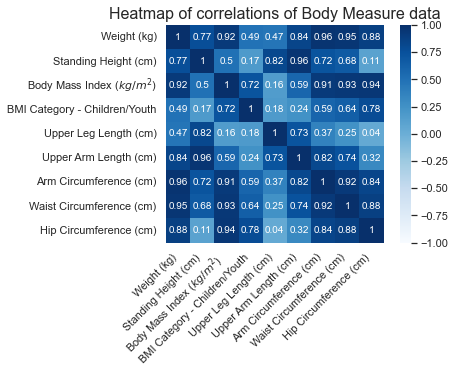

In [6]:
bmcorr = bmdata2.corr()
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(
    bmcorr, 
    vmin=-1, vmax=1,
    cmap='Blues',
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Heatmap of correlations of Body Measure data', fontsize=16)
plt.show()

# Blood Pressure Data

In [7]:
bpdata = pd.read_sas('data/P_BPXO.XPT')
bpnames = { 
    'SEQN' : 'Respondent sequence number',
    'BPAOARM' : 'Arm selected - oscillometric',
    'BPAOCSZ' :'Coded cuff size - oscillometric',
    'BPXOSY1' : 'Systolic - 1st oscillometric reading',
    'BPXODI1' : 'Diastolic - 1st oscillometric reading',
    'BPXOSY2' : 'Systolic - 2nd oscillometric reading',
    'BPXODI2' : 'Diastolic - 2nd oscillometric reading',
    'BPXOSY3' : 'Systolic - 3rd oscillometric reading',
    'BPXODI3' : 'Diastolic - 3rd oscillometric reading',
    'BPXOPLS1' : 'Pulse - 1st oscillometric reading',
    'BPXOPLS2' : 'Pulse - 2nd oscillometric reading',
    'BPXOPLS3' : 'Pulse - 3rd oscillometric reading'
}
bpdata = bpdata.rename(columns=bpnames)
bpdata

,Respondent sequence number,Arm selected - oscillometric,Coded cuff size - oscillometric,Systolic - 1st oscillometric reading,Diastolic - 1st oscillometric reading,Systolic - 2nd oscillometric reading,Diastolic - 2nd oscillometric reading,Systolic - 3rd oscillometric reading,Diastolic - 3rd oscillometric reading,Pulse - 1st oscillometric reading,Pulse - 2nd oscillometric reading,Pulse - 3rd oscillometric reading
0,109264.0,b'R',3.0,109.0,67.0,109.0,68.0,106.0,66.0,94.0,95.0,91.0
1,109266.0,b'R',4.0,99.0,56.0,99.0,55.0,99.0,52.0,68.0,66.0,66.0
2,109270.0,b'R',3.0,123.0,73.0,124.0,77.0,127.0,70.0,95.0,98.0,93.0
3,109271.0,b'R',4.0,102.0,65.0,108.0,68.0,111.0,68.0,73.0,71.0,70.0
4,109273.0,b'R',3.0,116.0,68.0,110.0,66.0,115.0,68.0,71.0,70.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11651,124815.0,b'R',4.0,141.0,87.0,138.0,86.0,141.0,87.0,56.0,56.0,58.0
11652,124817.0,b'R',4.0,111.0,69.0,112.0,67.0,113.0,66.0,70.0,70.0,72.0
11653,124818.0,b'R',4.0,106.0,67.0,108.0,65.0,95.0,70.0,120.0,119.0,118.0
11654,124821.0,b'R',3.0,121.0,66.0,122.0,67.0,129.0,67.0,60.0,61.0,61.0


In [8]:
bpdata2 = bpdata.drop(['Respondent sequence number', 'Arm selected - oscillometric'], axis=1)
bpdata2

,Coded cuff size - oscillometric,Systolic - 1st oscillometric reading,Diastolic - 1st oscillometric reading,Systolic - 2nd oscillometric reading,Diastolic - 2nd oscillometric reading,Systolic - 3rd oscillometric reading,Diastolic - 3rd oscillometric reading,Pulse - 1st oscillometric reading,Pulse - 2nd oscillometric reading,Pulse - 3rd oscillometric reading
0,3.0,109.0,67.0,109.0,68.0,106.0,66.0,94.0,95.0,91.0
1,4.0,99.0,56.0,99.0,55.0,99.0,52.0,68.0,66.0,66.0
2,3.0,123.0,73.0,124.0,77.0,127.0,70.0,95.0,98.0,93.0
3,4.0,102.0,65.0,108.0,68.0,111.0,68.0,73.0,71.0,70.0
4,3.0,116.0,68.0,110.0,66.0,115.0,68.0,71.0,70.0,70.0
...,...,...,...,...,...,...,...,...,...,...
11651,4.0,141.0,87.0,138.0,86.0,141.0,87.0,56.0,56.0,58.0
11652,4.0,111.0,69.0,112.0,67.0,113.0,66.0,70.0,70.0,72.0
11653,4.0,106.0,67.0,108.0,65.0,95.0,70.0,120.0,119.0,118.0
11654,3.0,121.0,66.0,122.0,67.0,129.0,67.0,60.0,61.0,61.0


In [9]:
bpdata2.mean()

Coded cuff size - oscillometric            3.501301
Systolic - 1st oscillometric reading     120.004637
Diastolic - 1st oscillometric reading     72.035742
Systolic - 2nd oscillometric reading     119.732255
Diastolic - 2nd oscillometric reading     71.503825
Systolic - 3rd oscillometric reading     119.681898
Diastolic - 3rd oscillometric reading     71.258798
Pulse - 1st oscillometric reading         71.183824
Pulse - 2nd oscillometric reading         71.946655
Pulse - 3rd oscillometric reading         72.550892
dtype: float64

In [10]:
bpdata2.corr()

,Coded cuff size - oscillometric,Systolic - 1st oscillometric reading,Diastolic - 1st oscillometric reading,Systolic - 2nd oscillometric reading,Diastolic - 2nd oscillometric reading,Systolic - 3rd oscillometric reading,Diastolic - 3rd oscillometric reading,Pulse - 1st oscillometric reading,Pulse - 2nd oscillometric reading,Pulse - 3rd oscillometric reading
Coded cuff size - oscillometric,1.000000,0.170994,0.337639,0.173627,0.339366,0.178986,0.342106,-0.081276,-0.093032,-0.107940
Systolic - 1st oscillometric reading,0.170994,1.000000,0.674561,0.950386,0.637523,0.939808,0.626704,-0.148800,-0.178041,-0.192196
Diastolic - 1st oscillometric reading,0.337639,0.674561,1.000000,0.666899,0.911813,0.665763,0.902653,0.093274,0.059821,0.043317
Systolic - 2nd oscillometric reading,0.173627,0.950386,0.666899,1.000000,0.667103,0.947402,0.639702,-0.156230,-0.187728,-0.202350
Diastolic - 2nd oscillometric reading,0.339366,0.637523,0.911813,0.667103,1.000000,0.652814,0.913515,0.084373,0.075841,0.050857
Systolic - 3rd oscillometric reading,0.178986,0.939808,0.665763,0.947402,0.652814,1.000000,0.665918,-0.151713,-0.180711,-0.195566
Diastolic - 3rd oscillometric reading,0.342106,0.626704,0.902653,0.639702,0.913515,0.665918,1.000000,0.084125,0.070231,0.067364
Pulse - 1st oscillometric reading,-0.081276,-0.148800,0.093274,-0.156230,0.084373,-0.151713,0.084125,1.000000,0.942628,0.933090
Pulse - 2nd oscillometric reading,-0.093032,-0.178041,0.059821,-0.187728,0.075841,-0.180711,0.070231,0.942628,1.000000,0.942932
Pulse - 3rd oscillometric reading,-0.107940,-0.192196,0.043317,-0.202350,0.050857,-0.195566,0.067364,0.933090,0.942932,1.000000


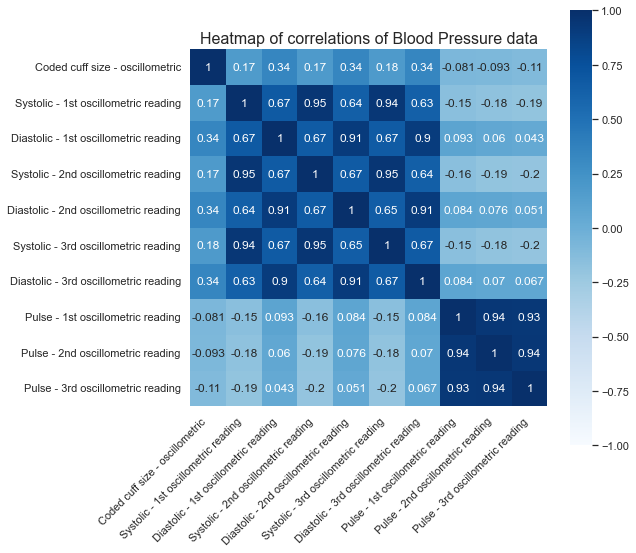

In [11]:
bpcorr = bpdata2.corr()
sns.set(rc={'figure.figsize':(8,8)})
ax2 = sns.heatmap(
    bpcorr, 
    vmin=-1, vmax=1,
    cmap='Blues',
    square=True,
    annot=True
)
ax2.set_xticklabels(
    ax2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax2.set_title('Heatmap of correlations of Blood Pressure data', fontsize=16)
plt.show()

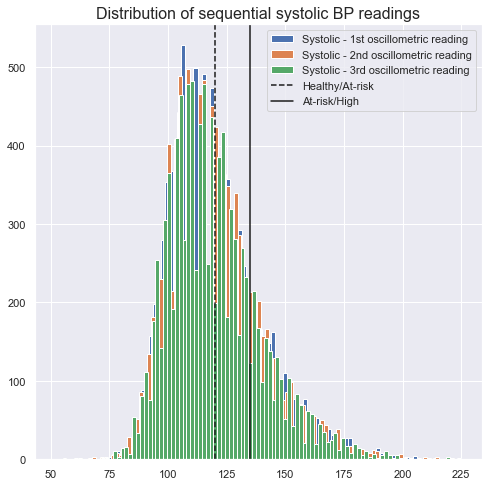

In [15]:
for i in ['Systolic - 1st oscillometric reading',
          'Systolic - 2nd oscillometric reading',
          'Systolic - 3rd oscillometric reading']:
    plt.hist(bpdata2[i], bins=100, label=i)
plt.title('Distribution of sequential systolic BP readings', fontsize=16)

# Optionally add references points for BP thresholds [1]:
plt.axvline(x=120,color='k', linestyle='--', label='Healthy/At-risk')
plt.axvline(x=135,color='k', linestyle='-', label='At-risk/High')

plt.legend()
plt.show()

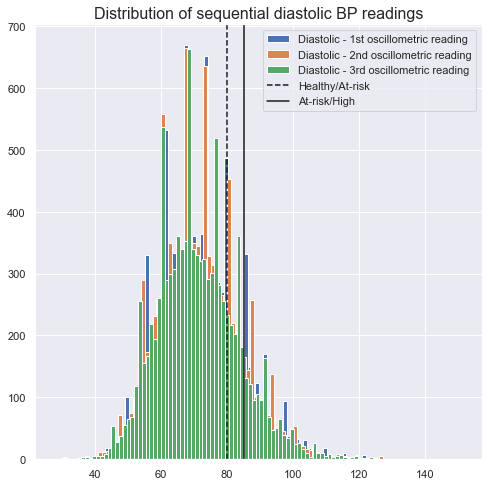

In [16]:
for i in ['Diastolic - 1st oscillometric reading',
          'Diastolic - 2nd oscillometric reading',
          'Diastolic - 3rd oscillometric reading']:
    plt.hist(bpdata2[i], bins=100, label=i)
plt.title('Distribution of sequential diastolic BP readings', fontsize=16)

# Optionally add references points for BP thresholds [1]:
plt.axvline(x=80,color='k', linestyle='--', label='Healthy/At-risk')
plt.axvline(x=85,color='k', linestyle='-', label='At-risk/High')

plt.legend()
plt.show()

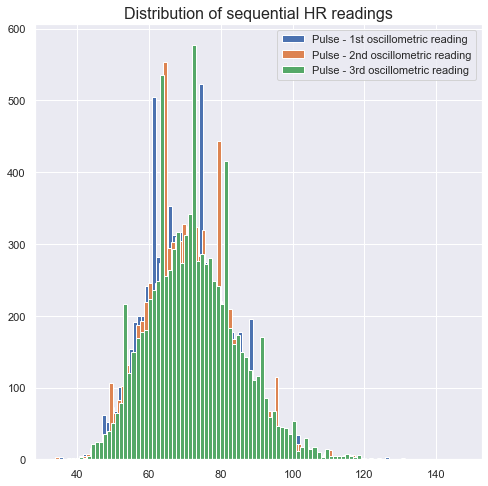

In [14]:
for i in ['Pulse - 1st oscillometric reading',
          'Pulse - 2nd oscillometric reading',
          'Pulse - 3rd oscillometric reading']:
    plt.hist(bpdata2[i], bins=100, label=i)
plt.title('Distribution of sequential HR readings', fontsize=16)
plt.legend()
plt.show()

## References
1. https://www.heartandstroke.ca/-/media/pdf-files/canada/health-information-catalogue/en-managing-your-blood-pressure.ashx